<a href="https://colab.research.google.com/github/nikenhpsr/projects/blob/main/Multiple_Linear_Regression_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTIPLE LINEAR REGRESSION ANALYSIS**

---



Linear Regression Analysis attempts to model the relationship between two variables by fitting a linear equation to the observed data. In this simple regression analysis, we have one explanatory variable and one dependent variable. However, what happens if we believe there is more than one explanatory variable that impacts the dependent variable? How would we model this?

We use the adjective "simple" to denote that our model has only predictor, and we use the adjective "multiple" to indicate that our model has at least two predictors.

In the multiple regression setting, because of the potentially large number of predictors, it is more efficient to use matrices to define the regression model and the subsequent analyses. This lesson considers some of the more important multiple regression formulas in matrix form.

**A Matrix Formulation of the Multiple Regression Model**

In the multiple regression setting, because of the potentially large number of predictors, it is more efficient to use matrices to define the regression model and the subsequent analyses. Here, we review basic matrix algebra, as well as learn some of the more important multiple regression formulas in matrix form.

Consider the following simple linear regression function:

$y_i=\beta_0+\beta_1x_i+\epsilon_i  \;\;\;\;\;\;\; \text {for } i=1, ... , n$


If we actually let  *i* = 1, ..., *n*, we see that we obtain n equations:
\begin{align} y_1 & =\beta_0+\beta_1x_1+\epsilon_1 \\ y_2 & =\beta_0+\beta_1x_2+\epsilon_2 \\ \vdots \\ y_n & = \beta_0+\beta_1x_n+\epsilon_n \end{align}


We can instead formulate the above simple linear regression function in matrix notation:


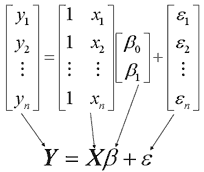



That is, instead of writing out the n equations, using matrix notation, our simple linear regression function reduces to a short and simple statement:

$Y=X\beta+\epsilon$

Now, what does this statement mean? Well, here's the answer:

* $X$ is an $n$ × 2 matrix.
* $Y$ is an $n$ × 1 column vector, 
* $\beta$ is a 2 × 1 column vector, and $\epsilon$ is an n × 1 column vector.
* The matrix $X$ and vector $\beta$ are multiplied together using the techniques of matrix multiplication.
* And, the vector $X\beta$ is added to the vector $\epsilon$ using the techniques of matrix addition.

**Ordinary Least Square Estimation**

The *predicted*, or estimated value of  $y$  given  $x$  is given by: 

**\begin{equation}
  \hat{y} = X b + e
 \label{eq:pred1}
\end{equation}**

in general, the hat symbol indicates an estimated or a predicted value.

Using the same method as Simple Linear Regression, OLS, we can predict the value of $\beta$ with this formula:

**\begin{equation}
    b= (X^{T}X)^{-1} (X^{T}y)
  \label{eq:mulb}
  \end{equation}**

with sample variance, covariance and error as states below:

**\begin{equation}
    e=y-\hat{y}=y - Xb
  \label{eq:ehat}
  \end{equation}**,
  

**\begin{equation}
    s^{2} = \frac{e^{T}e}{n-2}
  \label{eq:sampv}
  \end{equation}**,
  

**\begin{equation}
    \hat{cov(b)}=s^{2}(X^{T}X)^{-1} 
  \label{eq:sampcov}
  \end{equation}**

**Computation**

First, we are defining the data using *read.csv*. Then load and inspect the data as follows:

```
#analisis regresi berat badan
data=read.csv(file.choose(), sep = ";", header = T)
attach(data)
head(data)
```
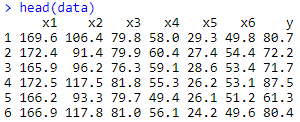

This data has body weight (in Kg) as an output and 6 variables as predictors. There are:

$x_1$ = Height (cm)

$x_2$ = Waist Circumference (cm)

$x_3$ = Bust (cm)

$x_4$ = Right Thigh Circumference (cm)

$x_5$ = Right Arm Circumference (cm)

$x_6$ = Head Circumference (cm)

We can compute $b$ using two methods. First is manual computation with a lot of matrix operation. Second, using R package called *lmtest*. This package is already included in *tidyverse* package.

**1. Manual Computation**
     
Computing predicted beta (coefficient) in multiple linear regression using matrix is stated in this code:

```
#Defining variables
y=as.matrix(data[,7])
n=nrow(y)
u=matrix(c(1),nrow=n,ncol=1)
x0=as.matrix(data[,c(1,2,3,4,5,6)])
x=cbind(u,x0)
```

then, we can compute values of $b$ using OLS estimator with this matrix operation:

```
#OLS Estimation of beta
b=solve(t(x)%*%x)%*%t(x)%*%y
```

this calculation yield values of predicted betas as stated below:

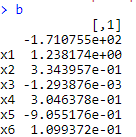

**2. Using *lmtest* packages**

We want to build a model for estimating body weight based on height, waist circumference, bust, right thigh circumference, right arm circumference, and head circumference, as follow:

$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5 + b_6 x_6$

You can compute the model coefficients in R as follow:

```
model <- lm(y~x1+x2+x3+x4+x5+x6, data = data)
summary(model)
```

this code returning the same values of predicted beta with manual computation but with more information.

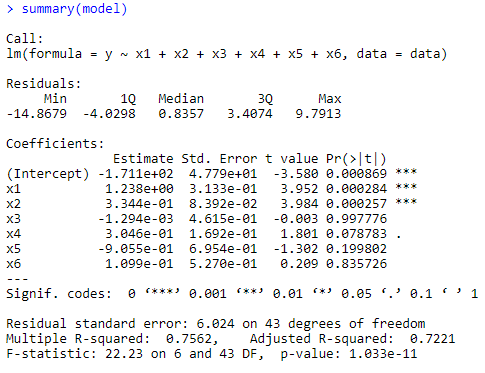

**Interpretation**

The first step in interpreting the multiple regression analysis is to examine the F-statistic and the associated p-value, at the bottom of model summary.

In our example, it can be seen that p-value of the F-statistic is < 1.033e-11, which is highly significant. This means that simultaneously when we are taking an inferencial from sample against population, predicted betas $b$ are significant or the values aren't zeros.

For a given the predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

It can be seen that, changing in $x_1$ (height) and $x_2$ (waist circumference) are significantly associated to changes in body weight while changes in another predictors variable aren't.

As the variable $x_3$ to $x_6$ are not significant, it is possible to remove it from the model.



**Model Accuracy Assessment**

As we have seen in simple linear regression, the overall quality of the model can be assessed by examining the R-squared ($R^2$).

**R-squared:**

In multiple linear regression, the $R^2$ represents the correlation coefficient between the observed values of the outcome variable ($y$) and the fitted (i.e., predicted) values of $\hat{y}$. For this reason, the value of R will always be positive and will range from zero to one.


$R^2$ represents the proportion of variance, in the outcome variable $y$, that may be predicted by knowing the value of the $x$ variables. An $R^2$ value close to 1 indicates that the model explains a large portion of the variance in the outcome variable.


A problem with the $R^2$, is that, it will always increase when more variables are added to the model, even if those variables are only weakly associated with the response (James et al. 2014). A solution is to adjust the $R^2$ by taking into account the number of predictor variables.


The adjustment in the “Adjusted R Square” value in the summary output is a correction for the number of $x$ variables included in the prediction model.


In this case, the value of R-Squared and Adjusted R-Squared is more than 0.7. This is indicating that the model explains a large portion of the variance in the outcome variable.

**Assumptions Regarding Linear Regression**

Since linear regression is a method to predict outcome from samples, several assumptions are needed. These assumptions are based on the (population) prediction errors, we do this through the study of the (sample) estimated errors, the residuals. For more information regarding regressions assumptions in R, [click here](https://github.com/nikenhpsr/projects/tree/main/Rstudio/Econometrics).

**References**

James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014. *An Introduction to Statistical Learning: With Applications in R*. Springer Publishing Company, Incorporated.

Kassambara, Alboukadel. 2018. *Multiple Linear Regression in R*. Statistical Tools for High-Throughput Data Analysis. http://www.sthda.com/english/articles/40-regression-analysis/168-multiple-linear-regression-in-r/.

Verbeek, Marno. 2008. *A guide to modern econometrics*. Chichester, England: John Wiley & Sons.